# TEAM 2 MOVIE RECOMMENDER SYSTEM

![image.png](https://manofmany.com/wp-content/uploads/2020/04/Veboli-new-2.jpg)

# Team members
### Sithomile Mbuyazi
### Kgotso Phela
### Lehlogonolo Jessica Teffo
### Bornwise Mahlaule
### Sebaka Mogano

# Table of Content
### [1. Introduction](#introduction)
### [2. Loading Data, Libraries and Comet](#data)
### [3. Exploratory Data Analysis](#EDA)
### [4. Model Building](#modeling)
### [5. Submission](#submission)
### [6. Conclusion](#conclusion)


<a id="introduction"></a>
# **1. Introduction**



In today’s technology driven world, recommender systems are socially and economically critical to ensure that individuals can make optimised choices surrounding the content they engage with on a daily basis. One application where this is especially true is movie recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.

With this context, EDSA is challenging you to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being personalised recommendations - generating platform affinity for the streaming services which best facilitates their audience's viewing.

![Image of Movie Recommender systems](https://research.aimultiple.com/wp-content/uploads/2017/08/recommendation-system.png)

<a id="data"></a>
###  **2. Loading Data, Libraries and Comet**


---


### 2.1 Comet Experiement
Comet will be used for version control

In [ ]:
# import comet_ml at the top of your file
import comet_ml
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="uIA4LnUcw5MgXtaoZFKhjA8kp",
    project_name="team-2-unsupervised",
    workspace="bravo",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connection.py", line 169, in _new_conn
    conn = connection.create_connection(
  File "C:\ProgramData\Anaconda3\lib\site-packages\urllib3\util\connection.py", line 73, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\ProgramData\Anaconda3\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py", line 382, in _make_request
    self._validate_conn(conn)
  File "C:\ProgramData\Anaconda3\lib\site-packages\urllib

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connection.py", line 169, in _new_conn
    conn = connection.create_connection(
  File "C:\ProgramData\Anaconda3\lib\site-packages\urllib3\util\connection.py", line 73, in create_connection
    for res in socket.getaddrinfo(host, port, family, socket.SOCK_STREAM):
  File "C:\ProgramData\Anaconda3\lib\socket.py", line 918, in getaddrinfo
    for res in _socket.getaddrinfo(host, port, family, type, proto, flags):
socket.gaierror: [Errno 11001] getaddrinfo failed

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py", line 699, in urlopen
    httplib_response = self._make_request(
  File "C:\ProgramData\Anaconda3\lib\site-packages\urllib3\connectionpool.py", line 382, in _make_request
    self._validate_conn(conn)
  File "C:\ProgramData\Anaconda3\lib\site-packages\urllib

### 2.2. Import all neccessary libraries and packages

In [ ]:

import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp


# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud 
from wordcloud import WordCloud, STOPWORDS
import time



# Packages for modeling
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from sklearn.cluster import KMeans
from surprise import SlopeOne
from surprise import CoClustering
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise import SVD, BaselineOnly, CoClustering, NMF
from sklearn.feature_extraction.text import CountVectorizer as CountVectorizer

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

In [ ]:
conda install -c conda-forge wordcloud



Note: you may need to restart the kernel to use updated packages.


usage: conda-script.py [-h] [-V] command ...
conda-script.py: error: unrecognized arguments: wordcloud


### 2.3. Import data

In [ ]:
# Mount content drive (That contains the CSV files)
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import the data using the paths to the CSV files from google drive
sample_submission = pd.read_csv('/content/drive/MyDrive/Data/sample_submission.csv')
movies = pd.read_csv('/content/drive/MyDrive/Data/movies.csv')
imdb = pd.read_csv('/content/drive/MyDrive/Data/imdb_data.csv')
genome_scores = pd.read_csv('/content/drive/MyDrive/Data/genome_scores.csv')
genome_tags = pd.read_csv('/content/drive/MyDrive/Data/genome_tags.csv')
train = pd.read_csv('/content/drive/MyDrive/Data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Data/test.csv')
tags = pd.read_csv('/content/drive/MyDrive/Data/tags.csv')
links = pd.read_csv('/content/drive/MyDrive/Data/links.csv')

In [ ]:
# Store data (serialize)
with open('movies.pickle', 'wb') as handle:
    pickle.dump(imdb, handle, protocol=pickle.HIGHEST_PROTOCOL)

## DATA VIEWING
---

Following the necessary imports is for viewing the data to see what information we can get from it.

In [ ]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [ ]:
genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [ ]:
genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [ ]:
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [ ]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [ ]:
test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [ ]:
sample_submission.head()

,Id,rating
0,1_2011,1.0
1,1_4144,1.0
2,1_5767,1.0
3,1_6711,1.0
4,1_7318,1.0


In [ ]:
# merge the train and movies datasets
dataset=pd.merge(train,movies,on='movieId')

In [ ]:
# view the first five rows of our merged dataframe
dataset.head()

,userId,movieId,rating,timestamp,title,genres
0,5163,57669,4.0,1518349992,In Bruges (2008),Comedy|Crime|Drama|Thriller
1,87388,57669,3.5,1237455297,In Bruges (2008),Comedy|Crime|Drama|Thriller
2,137050,57669,4.0,1425631854,In Bruges (2008),Comedy|Crime|Drama|Thriller
3,120490,57669,4.5,1408228517,In Bruges (2008),Comedy|Crime|Drama|Thriller
4,50616,57669,4.5,1446941640,In Bruges (2008),Comedy|Crime|Drama|Thriller


In [ ]:
# merege the imdb and movies dataframes
dataset1=pd.merge(imdb,movies,on='movieId')

In [ ]:
# merge the imdb and tags dataframes
data=pd.merge(imdb,tags,on='movieId')

In [ ]:
# have a look at the merged dataframe
data

,movieId,title_cast,director,runtime,budget,plot_keywords,userId,tag,timestamp
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,791,Owned,1515175493
1,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,1048,imdb top 250,1172144394
2,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,1361,Pixar,1216146311
3,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,3164,Pixar,1223304727
4,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,3164,time travel,1223304729
...,...,...,...,...,...,...,...,...,...
903062,131262,Sophie Lane Curtis|Kelly Reilly|Graham Phillip...,Hilary Brougher,96.0,NaN,hex|witch|virgin|blood,6550,car accident,1527214719
903063,131262,Sophie Lane Curtis|Kelly Reilly|Graham Phillip...,Hilary Brougher,96.0,NaN,hex|witch|virgin|blood,6550,high school,1527214719
903064,131262,Sophie Lane Curtis|Kelly Reilly|Graham Phillip...,Hilary Brougher,96.0,NaN,hex|witch|virgin|blood,6550,woman director,1527214719
903065,131262,Sophie Lane Curtis|Kelly Reilly|Graham Phillip...,Hilary Brougher,96.0,NaN,hex|witch|virgin|blood,33844,Vampire,1436145769


In [ ]:
#with open('movie.pkl', 'wb') as handle:
#    pickle.dump(movies, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
# first five rows of our merged dataframe (dataset1)
dataset1.head()

,movieId,title_cast,director,runtime,budget,plot_keywords,title,genres
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game,Jumanji (1995),Adventure|Children|Fantasy
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry,Grumpier Old Men (1995),Comedy|Romance
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion,Father of the Bride Part II (1995),Comedy


##  **3. Data Preprocessing**
---

Firstly, we check if our data has any null values, missing values and blank spaces.

In [ ]:
train.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [ ]:
test.isnull().sum()

userId     0
movieId    0
dtype: int64

In [ ]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [ ]:
imdb.isnull().sum()

movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64

In [ ]:
genome_scores.isnull().sum()

movieId      0
tagId        0
relevance    0
dtype: int64

In [ ]:
genome_tags.isnull().sum()

tagId    0
tag      0
dtype: int64

In [ ]:
tags.isnull().sum()

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64

In [ ]:
links.isnull().sum()

movieId      0
imdbId       0
tmdbId     107
dtype: int64

In [ ]:
movies.itertuples()

We observe that only three of our dataframes (imdb, tags and links) have some null values in some of their columns.

Now let's see if we have any cells that are blank in our data.

In [ ]:
def blanks(df):
    """
    This function takes in a dataframe as an input and returns the number of blank spaces in that dataframe
    """
    
    blnks = []  

    for ms in df.itertuples():
        
        if type(ms)==str:            
            if ms.isspace():         
                blnks.append(ms)     
        
    print(len(blnks), 'blanks: ', blnks)

In [ ]:
blanks(train)

0 blanks:  []


In [ ]:
blanks(test)

0 blanks:  []


In [ ]:
blanks(movies)

0 blanks:  []


In [ ]:
blanks(imdb)

0 blanks:  []


In [ ]:
blanks(genome_scores)

0 blanks:  []


In [ ]:
blanks(genome_tags)

0 blanks:  []


In [ ]:
blanks(tags)

0 blanks:  []


In [ ]:
blanks(links)

0 blanks:  []


We notice that we do not have any blanks in our data based on the above


## **3. Exploratory Data Analysis**


---

Now let us begin the process of exploring our data. This process will be referred to as Exploratory Data Analysis or EDA. The reason we explore the data is to gain insight on the data and how it behaves. Exploratory data analysis (EDA) is a term for certain kinds of initial analysis and findings done with data sets, usually early on in an analytical process. Some experts describe it as “taking a peek” at the data to understand more about what it represents and how to apply it.

Exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods, it is the critical process of performing initial investigations on data to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

Pandas dataframe.info() function is used to get a concise summary of the dataframe. It comes really handy when doing exploratory analysis of the data

In [ ]:
## Creating a summary stats function
def Summary(df):
    return df.info()

In [ ]:
Summary(train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000038 entries, 0 to 10000037
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 305.2 MB


In [ ]:
Summary(test)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000019 entries, 0 to 5000018
Data columns (total 2 columns):
 #   Column   Dtype
---  ------   -----
 0   userId   int64
 1   movieId  int64
dtypes: int64(2)
memory usage: 76.3 MB


In [ ]:
Summary(movies)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  62423 non-null  int64 
 1   title    62423 non-null  object
 2   genres   62423 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [ ]:
Summary(imdb)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        27278 non-null  int64  
 1   title_cast     17210 non-null  object 
 2   director       17404 non-null  object 
 3   runtime        15189 non-null  float64
 4   budget         7906 non-null   object 
 5   plot_keywords  16200 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.2+ MB


In [ ]:
Summary(genome_scores)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15584448 entries, 0 to 15584447
Data columns (total 3 columns):
 #   Column     Dtype  
---  ------     -----  
 0   movieId    int64  
 1   tagId      int64  
 2   relevance  float64
dtypes: float64(1), int64(2)
memory usage: 356.7 MB


In [ ]:
Summary(genome_tags)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   tagId   1128 non-null   int64 
 1   tag     1128 non-null   object
dtypes: int64(1), object(1)
memory usage: 17.8+ KB


In [ ]:
Summary(links)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62423 non-null  int64  
 1   imdbId   62423 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.4 MB


In [ ]:
Summary(tags)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093360 entries, 0 to 1093359
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   userId     1093360 non-null  int64 
 1   movieId    1093360 non-null  int64 
 2   tag        1093344 non-null  object
 3   timestamp  1093360 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 33.4+ MB


Most of the DataFrames have a Dtype of int64 and float64, which is an indication for numeric values. However, some DataFrames also have Dtype of an object, which is an indication of non-numeric character. The DataFrames which have a Dtype object include tags; movies; imdb; and genome_df's.

### Most common genres

In [ ]:
# Create dataframe containing only the movieId and genres
movies_genres = pd.DataFrame(movies[['movieId', 'genres']],
                             columns=['movieId', 'genres'])

# Split genres seperated by "|" and create a list containing the genres allocated to each movie
movies_genres.genres = movies_genres.genres.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-genre combination is in a seperate row
movies_genres = pd.DataFrame([(tup.movieId, d) for tup in movies_genres.itertuples() for d in tup.genres],
                             columns=['movieId', 'genres'])

movies_genres.head()

,movieId,genres
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


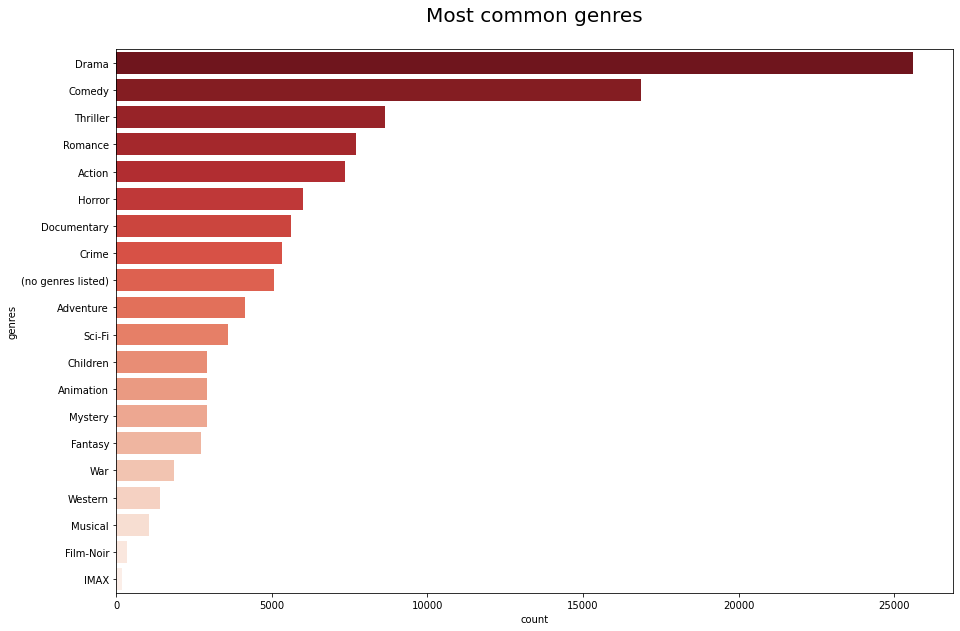

In [ ]:
# Plot the genres from most common to least common
plot = plt.figure(figsize=(15, 10))
plt.title('Most common genres\n', fontsize=20)
sns.countplot(y="genres", data=movies_genres,
              order=movies_genres['genres'].value_counts(ascending=False).index,
              palette='Reds_r')
plt.show()

##### Observation:
The graph above shows that the most common genres are drama, comedy, thriller, etc. People love drama movies more than any other genre therefore more of those should always form part of a user's recommendation. Children and animation genres are equally common and this could be attributed to the fact that most children's movies are animated.

### Ratings per user

In [ ]:
train1 = train.copy()
train1.drop('timestamp', axis = 1, inplace = True)

Combined number of ratings:	 34398 
Total number of movies:		 48213


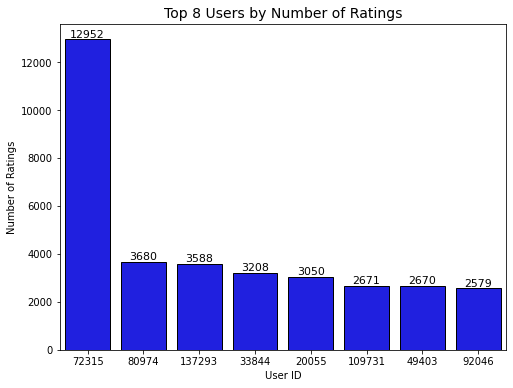

In [ ]:
def user_ratings_count(df, n):
    """
    Counts the number of user ratings.
    Parameters
    ----------
        df (DataFrame): input DataFrame
        n (int): number of users to show
    Returns
    -------
        barplot (NoneType): barplot of top n users by number of observations
    Example
    -------
        >>> df = pd.DataFrame({'userId':[1,2,3,1,2,4,5,4]})
        >>> user_ratings_count(df, 3)
            NoneType (barplot)
    """
    plt.figure(figsize=(8,6))
    data = df['userId'].value_counts().head(n)
    ax = sns.barplot(x = data.index, y = data, order= data.index, color='blue', edgecolor="black")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
    plt.title(f'Top {n} Users by Number of Ratings', fontsize=14)
    plt.xlabel('User ID')
    plt.ylabel('Number of Ratings')
    print("Combined number of ratings:\t",df['userId'].value_counts().head(n).sum(),
         "\nTotal number of movies:\t\t", df['movieId'].nunique())
    plt.show()
    
user_ratings_count(train1,8)

##### Observation: 
The bar graph above shows the number of times users have made ratings. About 20 000 users have only rated movies less than 
10 times while more than 100 000 have rated more than 10 times. There are super rators, such as userID 72315 that have made more than 10 000 ratings.
Insight drawn from this graph is that a lot of people do rate movies therefore a recommender system is worth the investment. 

### Distribution of ratings

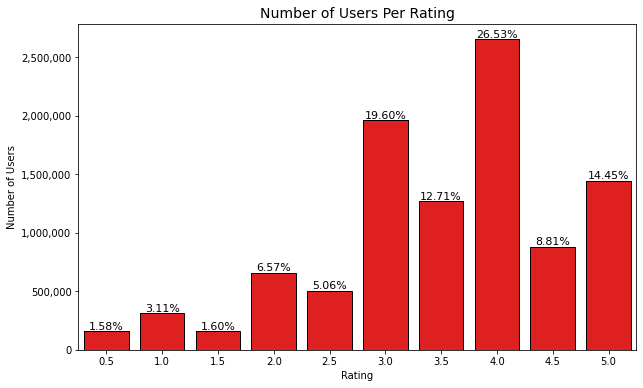

In [ ]:
movieRatingDistGroup = train1['rating'].value_counts().sort_index().reset_index()
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(data=movieRatingDistGroup, x='index', y='rating', color="red", edgecolor="black", ax=ax)
ax.set_xlabel("Rating")
ax.set_ylabel('Number of Users')
ax.set_yticklabels(['{:,}'.format(int(x)) for x in ax.get_yticks().tolist()])
total = float(movieRatingDistGroup['rating'].sum())
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height+350, '{0:.2%}'.format(height/total), fontsize=11, ha="center", va='bottom')
plt.title('Number of Users Per Rating', fontsize=14)
plt.show()

##### Observation:
The train distribution shows that there are relatively fewer movies that are lower rated. This can be because most of the users who didn't like the movie, didn't care enough to rate the movie. You should note this, it can be useful later. As you wouldn't want to recommend movies with relatively low number of ratings as users probably didn't like them.

4 Star ratings make up the largest portion of ratings in the MovieLens dataset, accounting for 26.5% of the overall ratings.
5 star ratings make up 14.5% of the overall ratings (3rd largest portion).
0.5 star ratings account for the smallest portion of the ratings at a mere 1.6%.
Ratings between 2 and 0.5 stars account for 12.9%

## Popular genre



<BarContainer object of 19 artists>

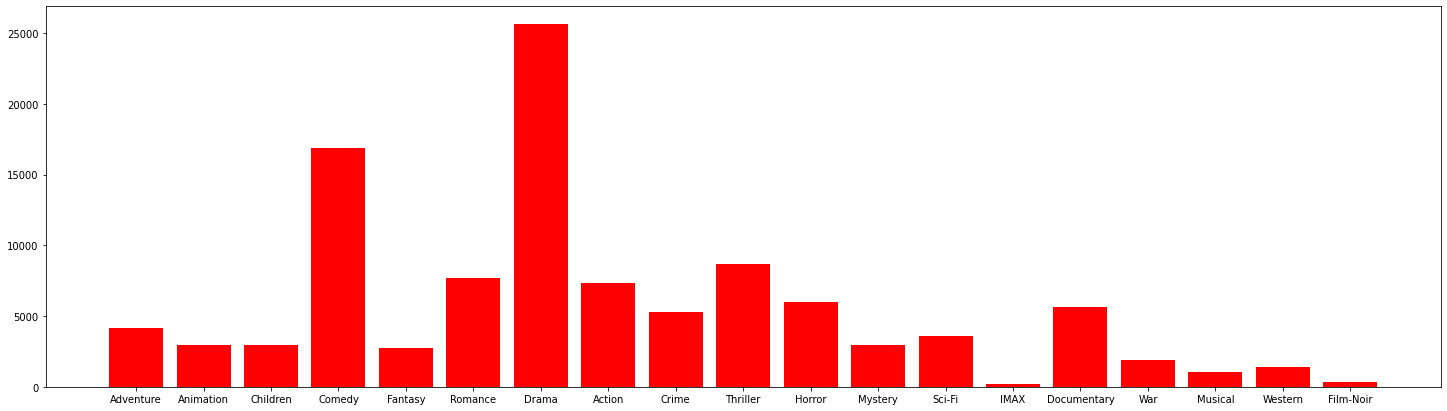

In [ ]:
plt.figure(figsize=(25,7))
generlist = movies['genres'].apply(lambda generlist_movie : str(generlist_movie).split("|"))
geners_count = {}

for generlist_movie in generlist:
    for gener in generlist_movie:
        if(geners_count.get(gener,False)):
            geners_count[gener]=geners_count[gener]+1
        else:
            geners_count[gener] = 1       
geners_count.pop("(no genres listed)")
plt.bar(geners_count.keys(),geners_count.values(),color='red')

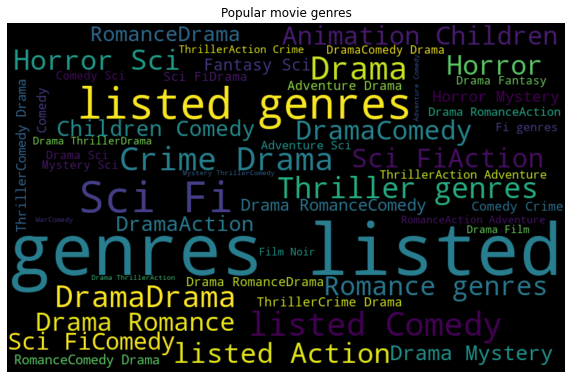

In [ ]:
import wordcloud
all_words=''.join([label for label in movies['genres']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110, max_words=50).generate(all_words)
plt.figure(figsize=(10,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Popular movie genres')

plt.show()

### Most appearing director

In [ ]:
def feature_count(df, column):
    plt.figure(figsize=(10,6))
    ax = sns.barplot(y = df[f'{column}'], x = df['count'], color='orange', orient='h')
    plt.title(f'Number of Movies Per {column}', fontsize=14)
    plt.ylabel(f'{column}')
    plt.xlabel('Count')
    plt.show()

In [ ]:
def count_directors(df, count = 10):
    """
    Function to count the most common dircetors in a DataFrame:
    Parameters
    ----------
        df (DataFrame): input dataframe containing imdb metadata
        count (int): filter directors with fewer than count films
        
    Returns
    -------
        directors (DataFrame): output DataFrame
    Examples
    --------
        >>> df = pd.DataFrame({'imdbid':[0,1,2,3,4,5], 'director': [A,B,A,C,B]})
        >>> count_directors(df, count = 1)
            |index|director|count|
            |0|A|2|
            |1|B|2|
            |2|C|1|
    """
    directors = pd.DataFrame(df['director'].value_counts()).reset_index()
    directors.columns = ['director', 'count']
    # Lets only take directors who have made 10 or more movies otherwise we will have to analyze 11000 directors
    directors = directors[directors['count']>=count]
    return directors.sort_values('count', ascending = False)
directors = count_directors(imdb)

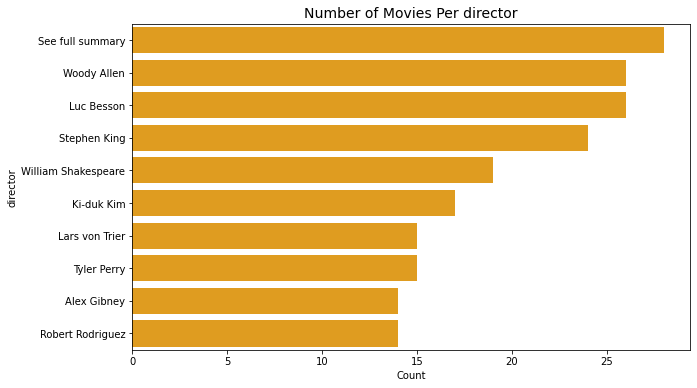

In [ ]:
feature_count(directors.head(10), 'director')

##### Observation:
From above we can see that some directors have directed movies a lot more than others. We have Luc Besson with the most directs at 26 movies and some directors at only 12 movies. The number of times directors have worked on a movie helps better understand their directing style and how they are likely to be rated. With this information, we should be able to make better recommendations based on the popularity of the director and their track record.

### Total movies released per year

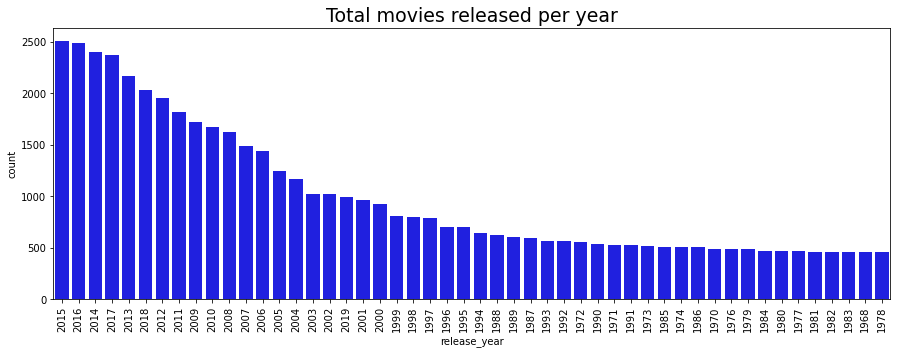

In [ ]:
#Plotting total amount of movies released in each year using a count plot.
figure= plt.subplots(figsize=(15, 5))
movies['release_year']=movies['title'].str[-5:-1] 
axes=sns.countplot(x=movies['release_year'], order = movies['release_year'].value_counts()[0:50].index,color='blue')
axes.set_title('Total movies released per year',fontsize=19)
plt.xticks(rotation=90)
plt.show()

In [ ]:
imdb['title_cast']=imdb['title_cast'].str.split('|') #spliting the title cast into a list
imdb['plot_keywords']=imdb['plot_keywords'].str.split('|') #spliting the Key words into a list
imdb.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter,81.0,"$30,000,000","[toy, rivalry, cowboy, cgi animation]"
1,2,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Jonathan Hensleigh,104.0,"$65,000,000","[board game, adventurer, fight, game]"
2,3,"[Walter Matthau, Jack Lemmon, Sophia Loren, An...",Mark Steven Johnson,101.0,"$25,000,000","[boat, lake, neighbor, rivalry]"
3,4,"[Whitney Houston, Angela Bassett, Loretta Devi...",Terry McMillan,124.0,"$16,000,000","[black american, husband wife relationship, be..."
4,5,"[Steve Martin, Diane Keaton, Martin Short, Kim...",Albert Hackett,106.0,"$30,000,000","[fatherhood, doberman, dog, mansion]"


##### Observation:
Above, we observe that the years 2015 and 2016 are the years where the highest number of movies were released.What the diagram above communicates to us is that as the years progress, the amount of movies being released have significantly increased.
This can be largely attributed to the fact that technology has changed a lot of industries and entry into these industry allows for fair competition and variety. 

In [ ]:
# Spliting the title cast into a list
imdb['title_cast']=imdb['title_cast'].str.split('|')

In [ ]:
#Plotting popular cast using a count-plot
plt.figure(figsize = (10,6))
title_cast=imdb['title_cast'].explode()
ax=sns.countplot(x=title_cast, order = title_cast.value_counts().index[:20],color='black')
ax.set_title('Top 20 Popular Actors',fontsize=15)
plt.xticks(rotation=90)
plt.show()


ValueError: ignored

<Figure size 720x432 with 0 Axes>

##### Observation:
Actors and actresses are artists that have a following and a fanbase. Some actors are contracted more than others. The graph above shows that Samuel L Jackson has been in more than 80 movies. Other famous actors as well have been featured a large number of times. People are likely to watch a movie that has their favourite actor in the movie and these artists wouldn't have been featured so many times if they weren't good. 

## titles wordclouds

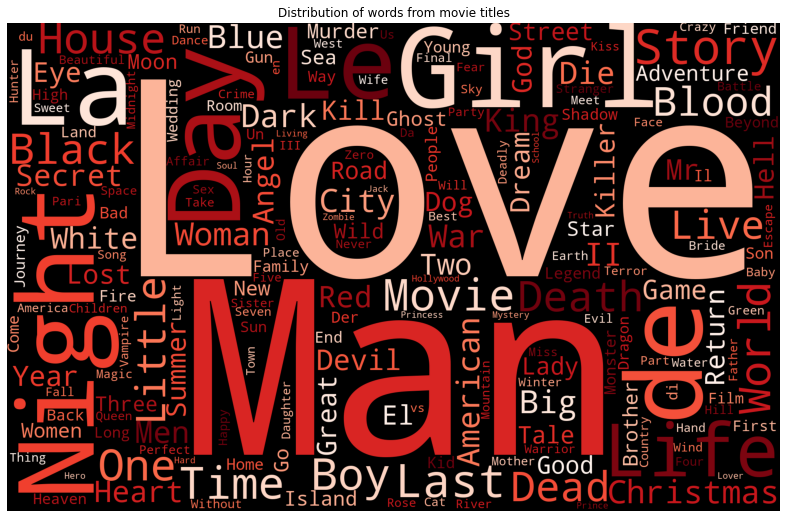

In [ ]:
# Wordcloud of movie titles
movies_word = movies['title'] = movies['title'].astype('str')
movies_wordcloud = ' '.join(movies_word)
title_wordcloud = WordCloud(stopwords = STOPWORDS,
                            background_color = 'Black',
                            height = 1200,
                            width = 1900,
                           colormap='Reds').generate(movies_wordcloud)
plt.figure(figsize = (14,7), facecolor=None)
plt.imshow(title_wordcloud)
plt.axis('off')
plt.title('Distribution of words from movie titles')
plt.tight_layout(pad=0)
plt.show()

##### Observation:
The visual above shows which words are commonly used when movies are titled. The bigger the word, the more it is being used. As can be seen, the word "love", "Man", and "Girl" appears the most.

<a id="modeling"></a>
##  Model Building


_ _ _

## Building the reccomender system
Recommender systems function with two kinds of information:

- Characteristic information: This is information about items (keywords, categories, etc.) and users (preferences, profiles, etc.).

- User-item interactions: This is information such as ratings, number of purchases, likes, etc.

Based on this, we can distinguish between three algorithms used in recommender systems



## CONTENT BASED FILTERING
Idea: If you like an item then you will also like a “similar” item

In [ ]:
# Convert data types to strings for string handling
dataset1['title_cast'] = dataset1.title_cast.astype(str)
dataset1['plot_keywords'] = dataset1.plot_keywords.astype(str)
dataset1['genres'] = dataset1.genres.astype(str)
dataset1['director'] = dataset1.director.astype(str)

In [ ]:
# Creating an empty column and list to store the corpus for each movie
dataset1['corpus'] = ''
corpus = []

# List of the columns we want to use to create our corpus 
columns = ['title_cast', 'director', 'plot_keywords', 'genres']

# For each movie, combine the contents of the selected columns to form it's unique corpus 
for i in range(0, len(dataset1['movieId'])):
    words = ''
    for col in columns:
        words = words + dataset1.iloc[i][col] + " "        
    corpus.append(words)
    # Add the corpus information for each movie to the dataframe 
dataset1['corpus'] = corpus
dataset1.set_index('movieId', inplace=True)

# Drop the columns we don't need anymore to preserve memory
dataset1.drop(columns=['title_cast', 'director', 'plot_keywords', 'genres'], inplace=True)

dataset1.head()

,runtime,budget,title,corpus
movieId,,,,
1,81.0,"$30,000,000",Toy Story (1995),Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...
2,104.0,"$65,000,000",Jumanji (1995),Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...
3,101.0,"$25,000,000",Grumpier Old Men (1995),Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...
4,124.0,"$16,000,000",Waiting to Exhale (1995),Whitney Houston|Angela Bassett|Loretta Devine|...
5,106.0,"$30,000,000",Father of the Bride Part II (1995),Steve Martin|Diane Keaton|Martin Short|Kimberl...


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer as CountVectorizer
cv = CountVectorizer()
count_matrix = cv.fit_transform(dataset1['corpus'])


Similarity is calculated as the cosine of the angle between the 2 vectors of the item vectors of A and B. The closer the vectors, the smaller the angle and larger the cosine similarity.

In [ ]:
cos_sim = cosine_similarity(count_matrix, count_matrix)
print(cos_sim.shape)
cos_sim

(24866, 24866)


array([[1.        , 0.06063391, 0.06482037, ..., 0.0498548 , 0.020646  ,
        0.08968971],
       [0.06063391, 1.        , 0.02227177, ..., 0.03425944, 0.        ,
        0.04622502],
       [0.06482037, 0.02227177, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.0498548 , 0.03425944, 0.        , ..., 1.        , 0.        ,
        0.01900372],
       [0.020646  , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.08968971, 0.04622502, 0.        , ..., 0.01900372, 0.        ,
        1.        ]])

In [ ]:
def get_topN_recommendations(title, n=10):
    """
    This function gets the top n recomended movies based on the 
    title of the movie input by the user 
    
    Input: title
           Datatype: str
           
           n (default = 10)
           Datatype: int
    """ 
    # Create a a copy of the input dataframe where the index has been reset
    df1 = dataset1.reset_index()
    
    # Extract the movie titles
    titles = df1['title']
    indices = pd.Series(df1.index, index=dataset1['title'])
    idx = indices[title]
    
    # Get the similarity scores of the top n movies most similar to the user input
    sim_scores = list(enumerate(cos_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:n]
    
    # Exctract the titles of the top n most similar movies  
    movie_indices = [i[0] for i in sim_scores]
    
    return titles.iloc[movie_indices]

get_topN_recommendations('Ice Age (2002)').head(10)

10648           Ice Age 2: The Meltdown (2006)
13437    Ice Age: Dawn of the Dinosaurs (2009)
18129      Ice Age 4: Continental Drift (2012)
9591             Pooh's Heffalump Movie (2005)
16662                   Winnie the Pooh (2011)
24597    Tom and Jerry: The Lost Dragon (2014)
18330                    Runaway Brain (1995) 
12008    Walk Hard: The Dewey Cox Story (2007)
24823                   Superstar Goofy (1991)
Name: title, dtype: object

## COLLABORATIVE FILTERING

## Feature Engineering

In [ ]:
# Load reader and data 
reader = Reader(rating_scale=(0.5, 5))
train2 = Dataset.load_from_df(train1[['userId', 'movieId', 'rating']], reader)


The models we are going to train are:
- Baseline Only model
- SVD model


## Hyperparameter tunning of best model

In [ ]:
rating_scale = Reader(rating_scale=(0.5, 5))
train = Dataset.load_from_df(train.drop('timestamp', axis=1), rating_scale)

# Training and validation set split for hypertuning
train_set, val_set = train_test_split(train,
                                      test_size=0.008,
                                      random_state=42)

# Modelling of the SVD hypertuning
svd_algo_hyper = SVD(n_factors=160, 
                     lr_all=0.0085,
                     reg_all=0.02,
                     n_epochs=20,
                     init_std_dev=0.01)
svd_algo_hyper.fit(train_set)

# Predicting on the validation set
svd_hyper_predictions = svd_algo_hyper.test(val_set)

# Convert the predictions to dataframe
#test = pd.DataFrame(predictions)
accuracy.rmse(svd_hyper_predictions)

# Dictionary for the data to log for the SVD tuned model
params = {'model_name': 'SVD_Tuned'}
metrics = {'RMSE': accuracy.rmse(svd_hyper_predictions)}

NameError: ignored

Hyperparameter tuning makes the process of determining the best hyperparameter settings easier and less tedious. The model that has been tuned is the SVD model and the performance increased. 

In [ ]:
mydict = {f'SVD Hyper': 0.7889,
          f'SVD': 0.8263,
          f'Baseline Only': 0.8652,
          f'NMF': 0.8810
         }

i = pd.DataFrame(mydict.items(), columns=['Model', 'RSME'])
i

#### Making predictions

In [ ]:
pred_svd_hyper = [svd_algo_hyper.predict(row.userId,
                                         row.movieId) for idx,row in test.iterrows()]

# Converting the predictions to a dataframe
test_pred_svd_hyper = pd.DataFrame(pred_svd_hyper)

#### Displaying predictions

In [ ]:
#renaming the fields of the prediction dataframe
test_pred_svd_hyper.drop(['r_ui', 'details'], axis=1, inplace=True)
test_pred_svd_hyper = test_pred_svd_hyper.rename(columns={'uid':'userId',
                                                          'iid':'movieId',
                                                          'est':'rating'})
test_pred_svd_hyper.head()

In [ ]:
# Concatenating each userId and movieId to a single Id column for submission
test_pred_svd_hyper['Id'] =  test_pred_svd_hyper['userId'].astype(str).str.zfill(1) + '_' + test_pred_svd_hyper['movieId'].astype(str).str.zfill(1)

In [ ]:
svd_hyper_predictions = test_pred_svd_hyper[['Id','rating']]
svd_hyper_predictions.head()

In [ ]:
svd_hyper_predictions[['Id','rating']].to_csv('MM2_submission.csv', index=False)

In [ ]:
svd_hyper_predictions

In [ ]:
model_save_path = "svd.pkl"
with open(model_save_path, 'wb') as file:
    pickle.dump(svd_algo_hyper, file)

In [ ]:
model_save_path = "nmf.pkl"
with open(model_save_path, 'wb') as file:
    pickle.dump(algo_nmf, file)

In [ ]:
model_save_path = "b.pkl"
with open(model_save_path, 'wb') as file:
    pickle.dump(algo_b, file)

In [ ]:
# Store data (serialize)
with open('movies.pickle', 'wb') as handle:
    pickle.dump(your_data, handle, protocol=pickle.HIGHEST_PROTOCOL)

#### Ending comet experiment

In [ ]:
params={"random_state":7,
        'model_name': 'SVD_Tuned',
        "stratify":True
}

metrics = {'RMSE': accuracy.rmse(svd_hyper_predictions)}


experiment.log_parameters(params)
experiment.log_metrics(metrics)


In [ ]:
experiment.end()

<a id="submission"></a>
##  Submission

In [ ]:
# Train the model on the entire dataset 
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(train[['userId','movieId','rating']], reader)
trainingSet = data.build_full_trainset()
svd.fit(trainingSet)

# Make predictions using the trained model
pred = [svd.predict(test.userId[i],test.movieId[i]).est for i in test.index]
test['rating'] = pred

In [ ]:
# Create the csv file for submission
test['Id'] = test['userId'].astype(str)+'_'+test['movieId'].astype(str)
test = test[['Id','rating']]
test.to_csv('svd_submission.csv', index=False)

In [ ]:
test.head()

<a id="conclusion"></a>
##  Conclusion

We implemented and evaluated different widely used Movie Recommendation models.We evaluated each model with the appropriate evaluation metric. We implemented novel technique to evaluate collaborative filtering algorithm by using SVD as a metric.

We attempted to build a model-based Collaborative Filtering movie recommendation sytem based on latent features from a low rank matrix factorization method called SVD. As it captures the underlying features driving the raw data, it can scale significantly better to massive datasets as well as make better recommendations based on user's tastes.